## Imports

In [1]:
import cv2
import pandas
import numpy
import matplotlib.pyplot as pyplot
import tensorflow
import keras
from keras.utils.vis_utils import plot_model
import pickle
from sklearn.metrics import confusion_matrix,classification_report
import seaborn

In [2]:
%matplotlib qt

## Data Imports

In [21]:
pickle_Training_features=open("../Data/Preprocessed_Data/Training_Objects/Pickle_Training_features.pickle","rb")
Training_features=pickle.load(pickle_Training_features)
pickle_Training_features.close()
pickle_Training_labels=open("../Data/Preprocessed_Data/Training_Objects/Pickle_Training_labels.pickle","rb")
Training_Labels=pickle.load(pickle_Training_labels)
pickle_Training_labels.close()

In [22]:
pickle_Testing_features=open("../Data/Preprocessed_Data/Testing_Objects/Pickle_Testing_features.pickle","rb")
Testing_features=pickle.load(pickle_Testing_features)
pickle_Testing_features.close()
pickle_Testing_labels=open("../Data/Preprocessed_Data/Testing_Objects/Pickle_Testing_labels.pickle","rb")
Testing_Labels=pickle.load(pickle_Testing_labels)
pickle_Testing_labels.close()

In [23]:
# Training_features

In [24]:
# Training_Labels

In [7]:
pyplot.imshow(Testing_features[0])

## Praparing Data for training

In [25]:
Training_features=numpy.array(Training_features)

In [26]:
Training_features.shape

(530, 160, 160, 3)

In [27]:
Testing_features=numpy.array(Testing_features)

In [28]:
Testing_features.shape

(125, 160, 160, 3)

In [12]:
Training_features[0].shape

(160, 160, 3)

In [13]:
# Training_features=numpy.expand_dims(Training_features,axis=-1)
# Testing_features=numpy.expand_dims(Testing_features,axis=-1)

In [14]:
Training_features.shape

(530, 160, 160, 3, 1)

In [20]:
Testing_features.shape

(125, 160, 160, 3)

# Model Definition

In [30]:
# Simple_Model_1=keras.models.Sequential(
# [
#     keras.layers.Conv2D(filters=64,kernel_size=2,strides=(1,1),padding='valid',activation='relu',input_shape=[160,160,1]),
#     keras.layers.MaxPool2D(pool_size=(2,2)),
#     keras.layers.Flatten(),
#     keras.layers.Dense(units=512,activation='relu'),
#     keras.layers.Dense(units=64,activation='relu'),
#     keras.layers.Dense(units=5,activation='softmax')
# ]
# )

# Simple_Model_1=keras.models.Sequential(
# [
#     keras.layers.Conv2D(filters=64,kernel_size=2,strides=(1,1),padding='valid',activation='relu',input_shape=[160,160,3]),
#     keras.layers.MaxPool2D(pool_size=(2,2)),
#     keras.layers.Flatten(),
#     keras.layers.Dense(units=512,activation='relu'),
#     keras.layers.Dense(units=64,activation='relu'),
#     keras.layers.Dense(units=5,activation='softmax')
# ]
# )


Simple_Model_1=keras.models.Sequential(
     [
         keras.layers.Conv2D(filters=128,kernel_size=3,strides=(1,1),padding='valid',activation='relu',input_shape=[160,160,3]),
         keras.layers.MaxPool2D(pool_size=(2,2)),
         keras.layers.Conv2D(filters=64,kernel_size=3,strides=(1,1),padding='valid',activation='relu',input_shape=[160,160,3]),
         keras.layers.MaxPool2D(pool_size=(2,2)),
         keras.layers.Conv2D(filters=32,kernel_size=3,strides=(1,1),padding='valid',activation='relu',input_shape=[160,160,3]),
         keras.layers.MaxPool2D(pool_size=(2,2)),
         keras.layers.Conv2D(filters=16,kernel_size=3,strides=(1,1),padding='valid',activation='relu',input_shape=[160,160,3]),
         keras.layers.MaxPool2D(pool_size=(2,2)),
         keras.layers.Flatten(),
         keras.layers.Dense(units=512,activation='relu'),
         keras.layers.Dense(units=256,activation='relu'),
         keras.layers.Dense(units=64,activation='relu'),
         keras.layers.Dense(units=5,activation='softmax'),
     ]
 )

# Simple_Model_1=keras.models.Sequential([
#          keras.layers.Conv2D(filters=256, kernel_size=3, strides=(1,1), padding='valid',activation= 'relu', input_shape=[160,160,3]),
#          keras.layers.MaxPooling2D(pool_size=(2,2)),
#          keras.layers.Conv2D(filters=64, kernel_size=3, strides=(2,2), padding='same', activation='relu'),
#          keras.layers.MaxPooling2D(pool_size=(2,2)),
#          keras.layers.Conv2D(filters=16, kernel_size=3, strides=(2,2), padding='same', activation='relu'),
#          keras.layers.MaxPooling2D(pool_size=(2,2)),
#          keras.layers.Flatten(),
#          keras.layers.Dense(units=512, activation='relu'),
#          keras.layers.Dense(units=256, activation='relu'),
#          keras.layers.Dropout(0.15),
#          keras.layers.Dense(units=256, activation='relu'),
#          keras.layers.Dropout(0.10),                         
#          keras.layers.Dense(units=64, activation='relu'),
#          keras.layers.Dense(units=5, activation='softmax')
#     ]
#  )

In [31]:
Simple_Model_1

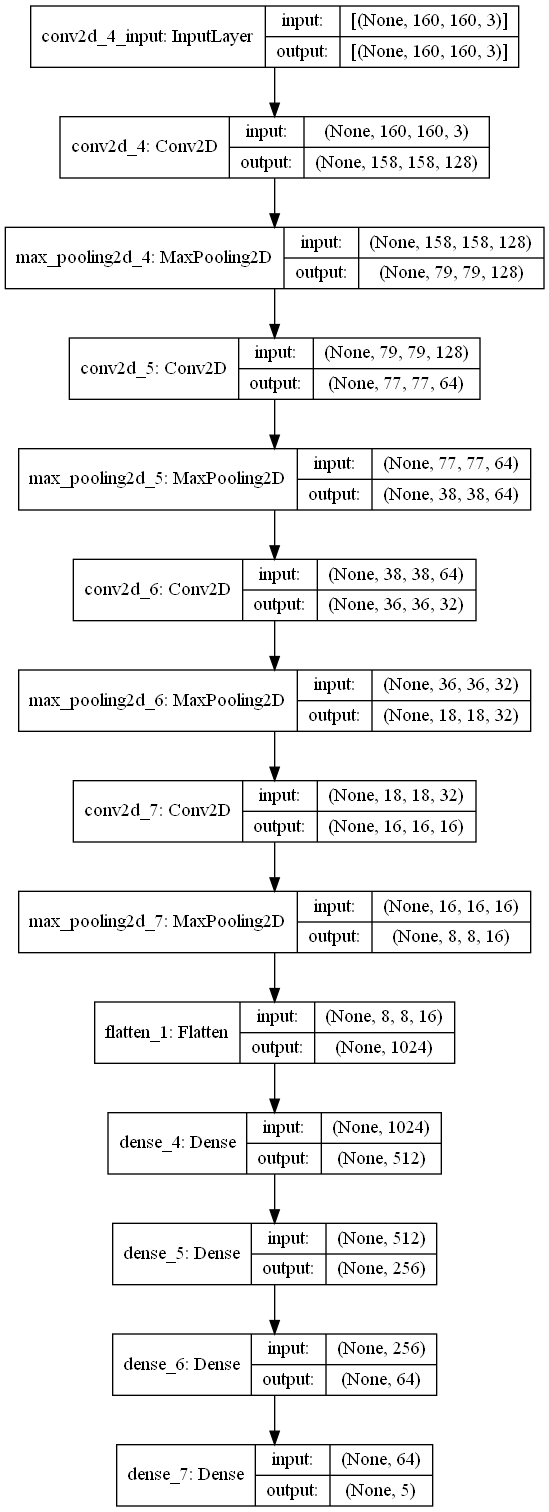

In [32]:
plot_model(Simple_Model_1, to_file='model_plot10.png', show_shapes=True, show_layer_names=True)

In [18]:
Simple_Model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 158, 158, 128)     3584      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 79, 79, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 77, 77, 64)        73792     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 38, 38, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 36, 36, 32)        18464     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 16)        4

In [33]:
Simple_Model_1.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy','sparse_categorical_crossentropy'])

In [34]:
Simple_Model_1.fit(Training_features,numpy.array(Training_Labels),epochs=20,verbose=1,validation_data=(Testing_features,numpy.array(Testing_Labels)))

Epoch 1/20
 3/17 [====>.........................] - ETA: 26s - loss: 1.6225 - accuracy: 0.1979 - sparse_categorical_crossentropy: 1.6225

KeyboardInterrupt: 

In [18]:
Simple_Model_1.fit(Training_features,numpy.array(Training_Labels),epochs=20,verbose=1,validation_data=(Testing_features,numpy.array(Testing_Labels)))

Epoch 1/20
17/17 [==============================] - 33s 2s/step - loss: 0.2982 - accuracy: 0.8962 - sparse_categorical_crossentropy: 0.2982 - val_loss: 1.5048 - val_accuracy: 0.6080 - val_sparse_categorical_crossentropy: 1.5048
Epoch 2/20
17/17 [==============================] - 33s 2s/step - loss: 0.1779 - accuracy: 0.9396 - sparse_categorical_crossentropy: 0.1779 - val_loss: 2.0778 - val_accuracy: 0.5520 - val_sparse_categorical_crossentropy: 2.0778
Epoch 3/20
17/17 [==============================] - 34s 2s/step - loss: 0.1262 - accuracy: 0.9679 - sparse_categorical_crossentropy: 0.1262 - val_loss: 2.7105 - val_accuracy: 0.5200 - val_sparse_categorical_crossentropy: 2.7105
Epoch 4/20
17/17 [==============================] - 33s 2s/step - loss: 0.1699 - accuracy: 0.9434 - sparse_categorical_crossentropy: 0.1699 - val_loss: 2.1785 - val_accuracy: 0.5440 - val_sparse_categorical_crossentropy: 2.1785
Epoch 5/20
17/17 [==============================] - 33s 2s/step - loss: 0.1719 - accurac

In [89]:
# Simple_Model_1.save("../Models/Simple_Model_5_colored_For_Crop_Detection.h5") 

## prediction

In [21]:
model=tensorflow.keras.models.load_model('../Models/Simple_Model_4_colored_For_Crop_Detection.h5')

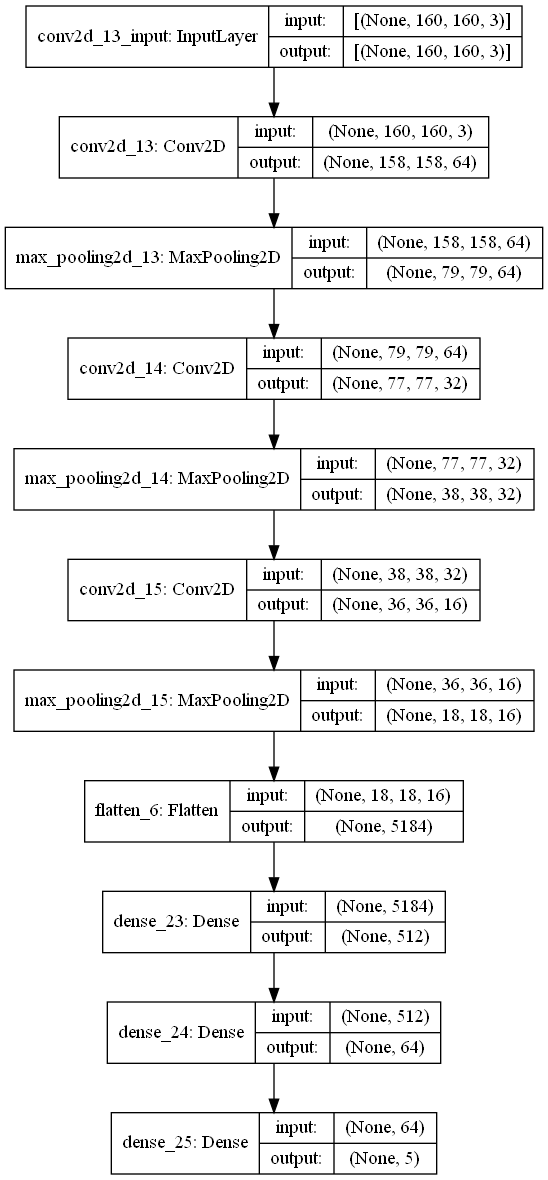

In [22]:
plot_model(model, to_file='model_plot10.png', show_shapes=True, show_layer_names=True)

In [24]:
Predictions=model.predict(Testing_features)

In [25]:
Predictions[50]

array([1.16769655e-07, 4.33371053e-04, 1.87035336e-03, 1.09235050e-04,
       9.97586966e-01], dtype=float32)

In [26]:
max(Predictions[50])

0.99758697

In [27]:
Training_Labels[50]

0

In [28]:
pyplot.imshow(Training_features[50],cmap='gray')

In [29]:
class_list=[
    "Cotton",
    "Maize",
    "Rice",
    "Sugarcane",
    "Wheat"
]

In [30]:
testing_image=cv2.imread("./cotton.jpg")
testing_image=cv2.resize(testing_image,(160,160))
testing_image=testing_image/255

In [31]:
# testing_image

array([[[0.70196078, 0.61960784, 0.58823529],
        [0.70588235, 0.61960784, 0.6       ],
        [0.74509804, 0.65098039, 0.60392157],
        ...,
        [0.63921569, 0.74509804, 0.89019608],
        [0.61960784, 0.7254902 , 0.87058824],
        [0.59607843, 0.70980392, 0.85490196]],

       [[0.72156863, 0.63529412, 0.59215686],
        [0.7254902 , 0.63137255, 0.60392157],
        [0.74901961, 0.65490196, 0.60784314],
        ...,
        [0.63137255, 0.73333333, 0.87843137],
        [0.62352941, 0.72941176, 0.8745098 ],
        [0.6       , 0.71372549, 0.85882353]],

       [[0.74509804, 0.65098039, 0.60392157],
        [0.74901961, 0.65098039, 0.61176471],
        [0.76078431, 0.66666667, 0.61960784],
        ...,
        [0.64313725, 0.74117647, 0.8745098 ],
        [0.61960784, 0.7254902 , 0.87058824],
        [0.59607843, 0.70980392, 0.85490196]],

       ...,

       [[0.12156863, 0.2       , 0.20392157],
        [0.1372549 , 0.21960784, 0.22352941],
        [0.1254902 , 0

In [32]:
testing_image=numpy.array([testing_image])

In [33]:
testing_image.shape

(1, 160, 160, 3)

In [34]:
# testing_image=numpy.expand_dims(testing_image,axis=-1)

In [36]:
predicted_crop=model.predict(testing_image)[0]

In [37]:
predicted_crop

array([1.8174514e-02, 9.2501318e-01, 2.1883087e-04, 2.8242948e-04,
       5.6311004e-02], dtype=float32)

In [38]:
def getClass(array):
    index=0
    max_=max(array)
    for i in range(len(array)):
        if array[i]==max_:
            index=i
#     print(class_list[index])
    return class_list[index]

In [39]:
getClass(predicted_crop)

'Maize'

In [40]:
Training_predictions=[]
Training_Labels_value=[]
for i in range(len(Predictions)):
    Training_predictions.append(getClass(Predictions[i]))
    Training_Labels_value.append(class_list[Training_Labels[i]])

In [41]:
# Training_predictions

['Wheat',
 'Cotton',
 'Sugarcane',
 'Wheat',
 'Wheat',
 'Cotton',
 'Cotton',
 'Cotton',
 'Cotton',
 'Rice',
 'Cotton',
 'Wheat',
 'Maize',
 'Sugarcane',
 'Wheat',
 'Rice',
 'Rice',
 'Wheat',
 'Cotton',
 'Cotton',
 'Rice',
 'Wheat',
 'Wheat',
 'Wheat',
 'Cotton',
 'Wheat',
 'Rice',
 'Rice',
 'Sugarcane',
 'Rice',
 'Sugarcane',
 'Maize',
 'Cotton',
 'Cotton',
 'Cotton',
 'Rice',
 'Wheat',
 'Sugarcane',
 'Maize',
 'Sugarcane',
 'Cotton',
 'Maize',
 'Sugarcane',
 'Wheat',
 'Wheat',
 'Cotton',
 'Cotton',
 'Maize',
 'Maize',
 'Cotton',
 'Wheat',
 'Rice',
 'Maize',
 'Sugarcane',
 'Rice',
 'Cotton',
 'Wheat',
 'Maize',
 'Cotton',
 'Rice',
 'Rice',
 'Sugarcane',
 'Rice',
 'Rice',
 'Wheat',
 'Sugarcane',
 'Wheat',
 'Cotton',
 'Sugarcane',
 'Rice',
 'Cotton',
 'Rice',
 'Sugarcane',
 'Sugarcane',
 'Wheat',
 'Rice',
 'Wheat',
 'Wheat',
 'Cotton',
 'Rice',
 'Cotton',
 'Rice',
 'Rice',
 'Maize',
 'Rice',
 'Cotton',
 'Cotton',
 'Rice',
 'Maize',
 'Rice',
 'Wheat',
 'Rice',
 'Wheat',
 'Maize',
 'Rice',

In [42]:
# Training_Labels_value

['Cotton',
 'Maize',
 'Maize',
 'Cotton',
 'Wheat',
 'Rice',
 'Wheat',
 'Rice',
 'Sugarcane',
 'Cotton',
 'Cotton',
 'Cotton',
 'Wheat',
 'Maize',
 'Wheat',
 'Cotton',
 'Rice',
 'Wheat',
 'Sugarcane',
 'Rice',
 'Sugarcane',
 'Wheat',
 'Wheat',
 'Maize',
 'Maize',
 'Wheat',
 'Maize',
 'Cotton',
 'Maize',
 'Sugarcane',
 'Cotton',
 'Wheat',
 'Rice',
 'Rice',
 'Rice',
 'Sugarcane',
 'Sugarcane',
 'Maize',
 'Rice',
 'Maize',
 'Sugarcane',
 'Maize',
 'Cotton',
 'Sugarcane',
 'Rice',
 'Rice',
 'Sugarcane',
 'Rice',
 'Maize',
 'Cotton',
 'Cotton',
 'Sugarcane',
 'Cotton',
 'Maize',
 'Maize',
 'Rice',
 'Maize',
 'Sugarcane',
 'Cotton',
 'Wheat',
 'Wheat',
 'Rice',
 'Wheat',
 'Sugarcane',
 'Sugarcane',
 'Maize',
 'Maize',
 'Rice',
 'Sugarcane',
 'Wheat',
 'Cotton',
 'Wheat',
 'Cotton',
 'Maize',
 'Rice',
 'Sugarcane',
 'Maize',
 'Wheat',
 'Cotton',
 'Cotton',
 'Sugarcane',
 'Wheat',
 'Cotton',
 'Sugarcane',
 'Sugarcane',
 'Maize',
 'Rice',
 'Maize',
 'Sugarcane',
 'Maize',
 'Rice',
 'Wheat',
 'S

In [43]:
print("Actual values --> Predicted values",)
for i in range(len(Predictions)):
    print(Training_Labels_value[i],"  ->  ",Training_predictions[i])

Actual values --> Predicted values
Cotton   ->   Wheat
Maize   ->   Cotton
Maize   ->   Sugarcane
Cotton   ->   Wheat
Wheat   ->   Wheat
Rice   ->   Cotton
Wheat   ->   Cotton
Rice   ->   Cotton
Sugarcane   ->   Cotton
Cotton   ->   Rice
Cotton   ->   Cotton
Cotton   ->   Wheat
Wheat   ->   Maize
Maize   ->   Sugarcane
Wheat   ->   Wheat
Cotton   ->   Rice
Rice   ->   Rice
Wheat   ->   Wheat
Sugarcane   ->   Cotton
Rice   ->   Cotton
Sugarcane   ->   Rice
Wheat   ->   Wheat
Wheat   ->   Wheat
Maize   ->   Wheat
Maize   ->   Cotton
Wheat   ->   Wheat
Maize   ->   Rice
Cotton   ->   Rice
Maize   ->   Sugarcane
Sugarcane   ->   Rice
Cotton   ->   Sugarcane
Wheat   ->   Maize
Rice   ->   Cotton
Rice   ->   Cotton
Rice   ->   Cotton
Sugarcane   ->   Rice
Sugarcane   ->   Wheat
Maize   ->   Sugarcane
Rice   ->   Maize
Maize   ->   Sugarcane
Sugarcane   ->   Cotton
Maize   ->   Maize
Cotton   ->   Sugarcane
Sugarcane   ->   Wheat
Rice   ->   Wheat
Rice   ->   Cotton
Sugarcane   ->   Cotton
Ri

In [44]:
Testing_predictions=[]
Testing_Labels_value=[]
for i in range(len(Predictions)):
    Testing_predictions.append(getClass(Predictions[i]))
    Testing_Labels_value.append(class_list[Testing_Labels[i]])

In [45]:
print("Actual values --> Predicted values",)
for i in range(len(Predictions)):
    print(Testing_Labels_value[i],"  ->  ",Testing_predictions[i])

Actual values --> Predicted values
Maize   ->   Wheat
Cotton   ->   Cotton
Sugarcane   ->   Sugarcane
Wheat   ->   Wheat
Sugarcane   ->   Wheat
Maize   ->   Cotton
Cotton   ->   Cotton
Cotton   ->   Cotton
Cotton   ->   Cotton
Rice   ->   Rice
Cotton   ->   Cotton
Wheat   ->   Wheat
Maize   ->   Maize
Wheat   ->   Sugarcane
Sugarcane   ->   Wheat
Rice   ->   Rice
Sugarcane   ->   Rice
Wheat   ->   Wheat
Cotton   ->   Cotton
Cotton   ->   Cotton
Rice   ->   Rice
Sugarcane   ->   Wheat
Rice   ->   Wheat
Wheat   ->   Wheat
Cotton   ->   Cotton
Rice   ->   Wheat
Rice   ->   Rice
Wheat   ->   Rice
Maize   ->   Sugarcane
Rice   ->   Rice
Sugarcane   ->   Sugarcane
Maize   ->   Maize
Cotton   ->   Cotton
Cotton   ->   Cotton
Sugarcane   ->   Cotton
Wheat   ->   Rice
Maize   ->   Wheat
Sugarcane   ->   Sugarcane
Maize   ->   Maize
Sugarcane   ->   Sugarcane
Cotton   ->   Cotton
Maize   ->   Maize
Sugarcane   ->   Sugarcane
Maize   ->   Wheat
Wheat   ->   Wheat
Maize   ->   Cotton
Wheat   ->   

In [48]:
confusion_matrix(Testing_Labels_value,Testing_predictions)

array([[24,  1,  0,  0,  3],
       [ 3, 11,  3,  2,  4],
       [ 1,  1, 19,  1,  3],
       [ 2,  1,  2, 13,  7],
       [ 1,  2,  9,  1, 11]], dtype=int64)

In [47]:
seaborn.heatmap(confusion_matrix(Testing_Labels_value,Testing_predictions),annot=True,xticklabels=class_list,yticklabels=class_list)

<AxesSubplot:>

In [49]:
print(classification_report(Testing_Labels_value,Testing_predictions))

              precision    recall  f1-score   support

      Cotton       0.77      0.86      0.81        28
       Maize       0.69      0.48      0.56        23
        Rice       0.58      0.76      0.66        25
   Sugarcane       0.76      0.52      0.62        25
       Wheat       0.39      0.46      0.42        24

    accuracy                           0.62       125
   macro avg       0.64      0.61      0.61       125
weighted avg       0.64      0.62      0.62       125

